# Introduction to data visualization with Matplotlib

## Using the matplotlib.pyplot interface

Initially, we will use the `pyplot` interface to create two kinds of objects: `Figure` objects and `Axes` objects.

### Figure

The **whole** figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. 

### Axes

This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each Axes has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`).

The Axes class and its member functions are the primary entry point to working with the OO interface.

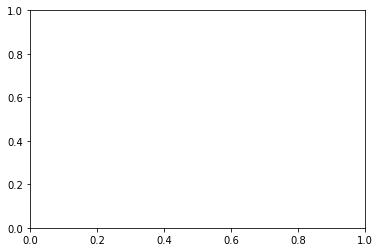

In [1]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

In [2]:
import pandas as pd

In [3]:
stocks = pd.read_csv('data/stocks.csv')

In [4]:
stocks.head()

,Date,AAPL,IBM,CSCO,MSFT
0,2000-01-03,111.937502,116.0000,108.0625,116.5625
1,2000-01-04,102.500003,112.0625,102.0000,112.6250
2,2000-01-05,103.999997,116.0000,101.6875,113.8125
3,2000-01-06,94.999998,114.0000,100.0000,110.0000
4,2000-01-07,99.500001,113.5000,105.8750,111.4375


In [5]:
stocks.shape

(3521, 5)

In [6]:
stocks = stocks.head(10) # only first 10

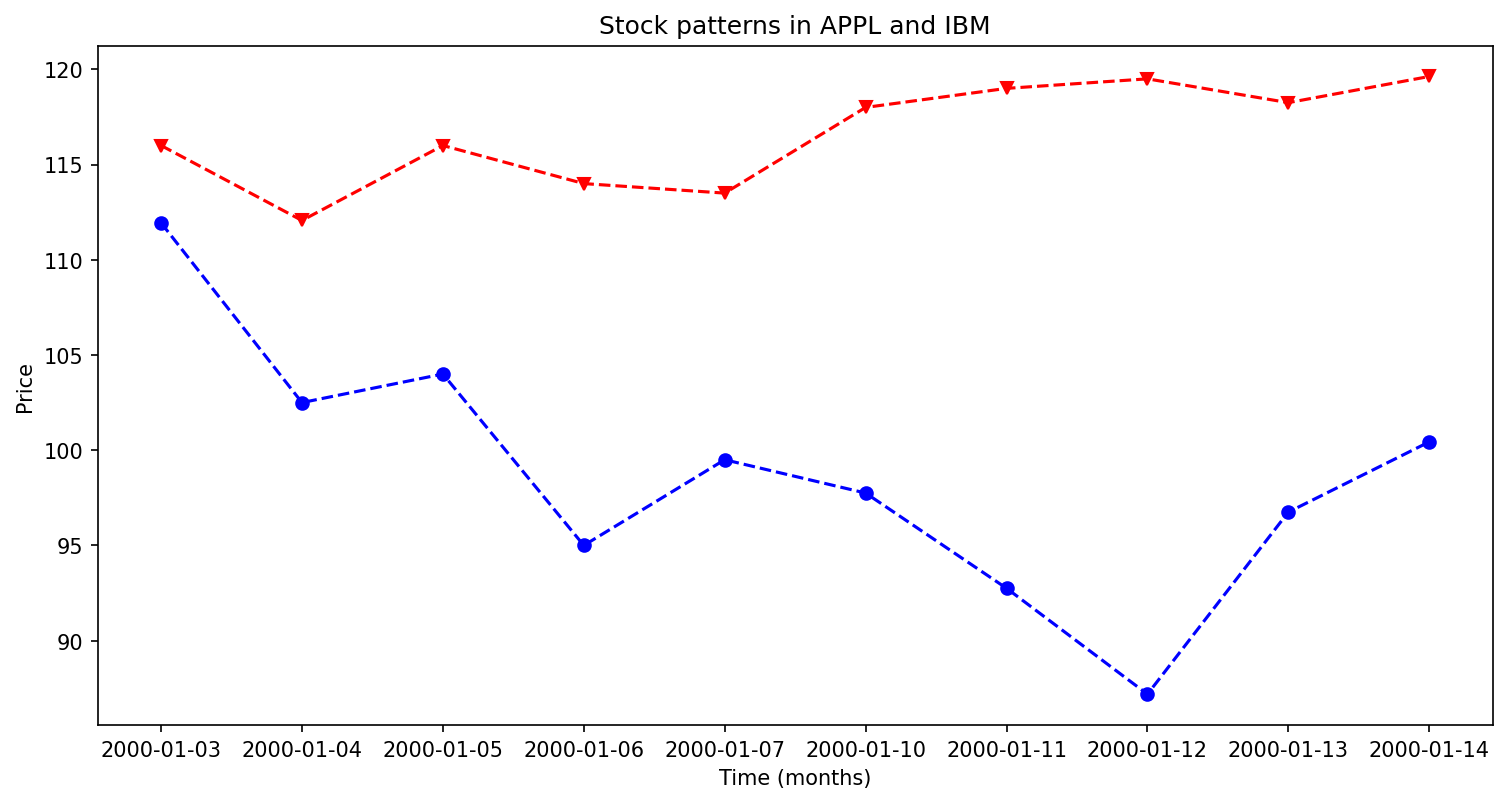

In [7]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(figsize = (12, 6), dpi = 150)

# Plot AAPL data, setting data appearance
ax.plot(stocks["Date"], stocks["AAPL"], color = 'b', marker = 'o', linestyle = '--')

# Plot IBM data, setting data appearance
ax.plot(stocks["Date"], stocks["IBM"], color = 'r', marker = 'v', linestyle = '--')

# Customize the x-axis label
ax.set_xlabel('Time (months)')

# Customize the y-axis label
ax.set_ylabel('Price')

# Add the title
ax.set_title("Stock patterns in APPL and IBM")

# Call show to display the resulting plot
plt.show()

## Small multiples with plt.subplots

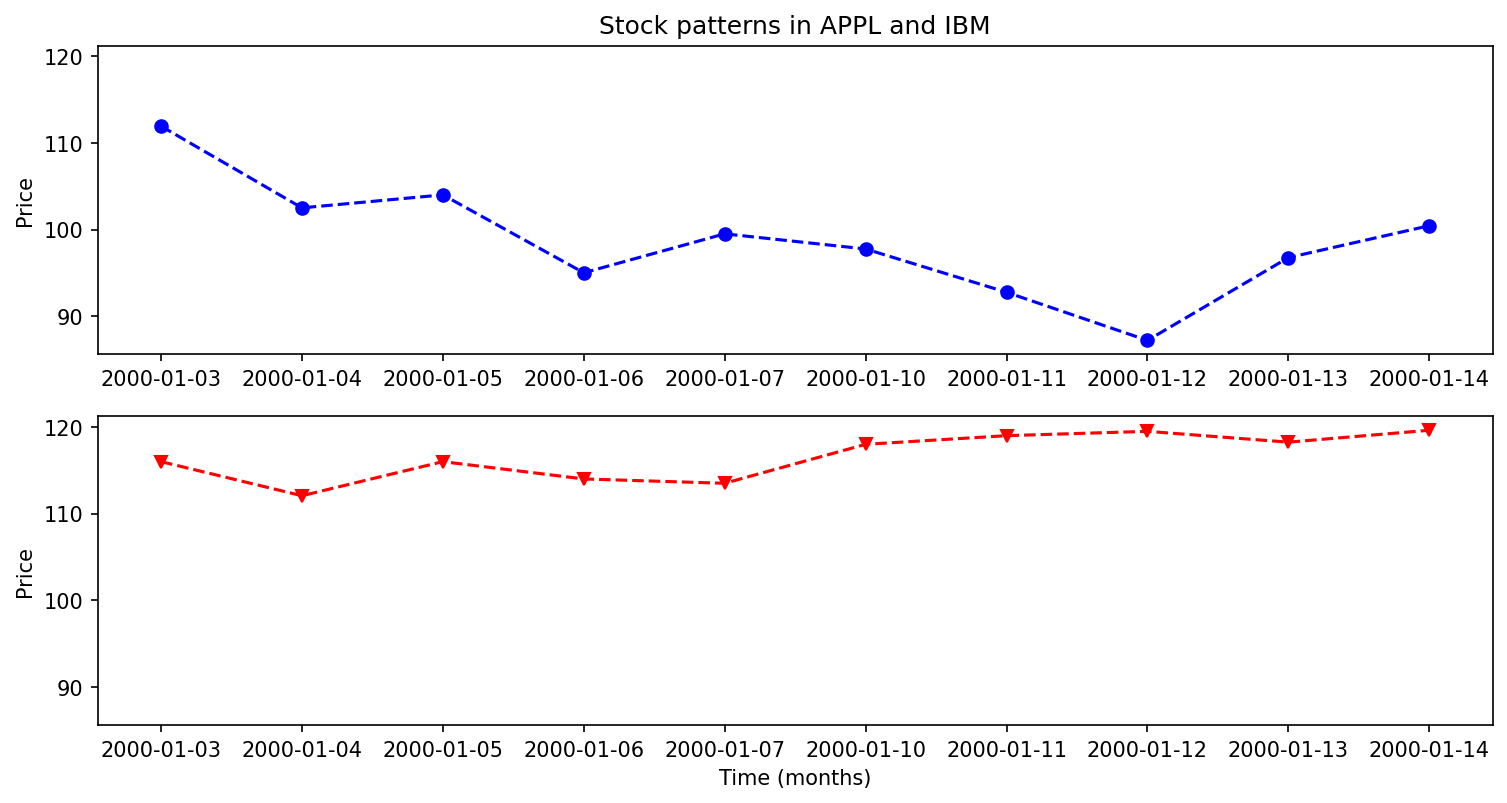

In [8]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots(2, 1, figsize = (12, 6), dpi = 150, sharey = True)

# Plot AAPL data, setting data appearance
ax[0].plot(stocks["Date"], stocks["AAPL"], color = 'b', marker = 'o', linestyle = '--')

# Plot IBM data, setting data appearance
ax[1].plot(stocks["Date"], stocks["IBM"], color = 'r', marker = 'v', linestyle = '--')

# Customize the x-axis label
ax[1].set_xlabel('Time (months)')

# Customize the y-axis label
ax[0].set_ylabel('Price')
ax[1].set_ylabel('Price')

# Add the title
ax[0].set_title("Stock patterns in APPL and IBM")

# Call show to display the resulting plot
plt.show()

## Plotting two variables

In [9]:
percent_bachelors = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv', parse_dates = ['Year'])

In [10]:
percent_bachelors.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970-01-01,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971-01-01,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972-01-01,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973-01-01,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974-01-01,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [11]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

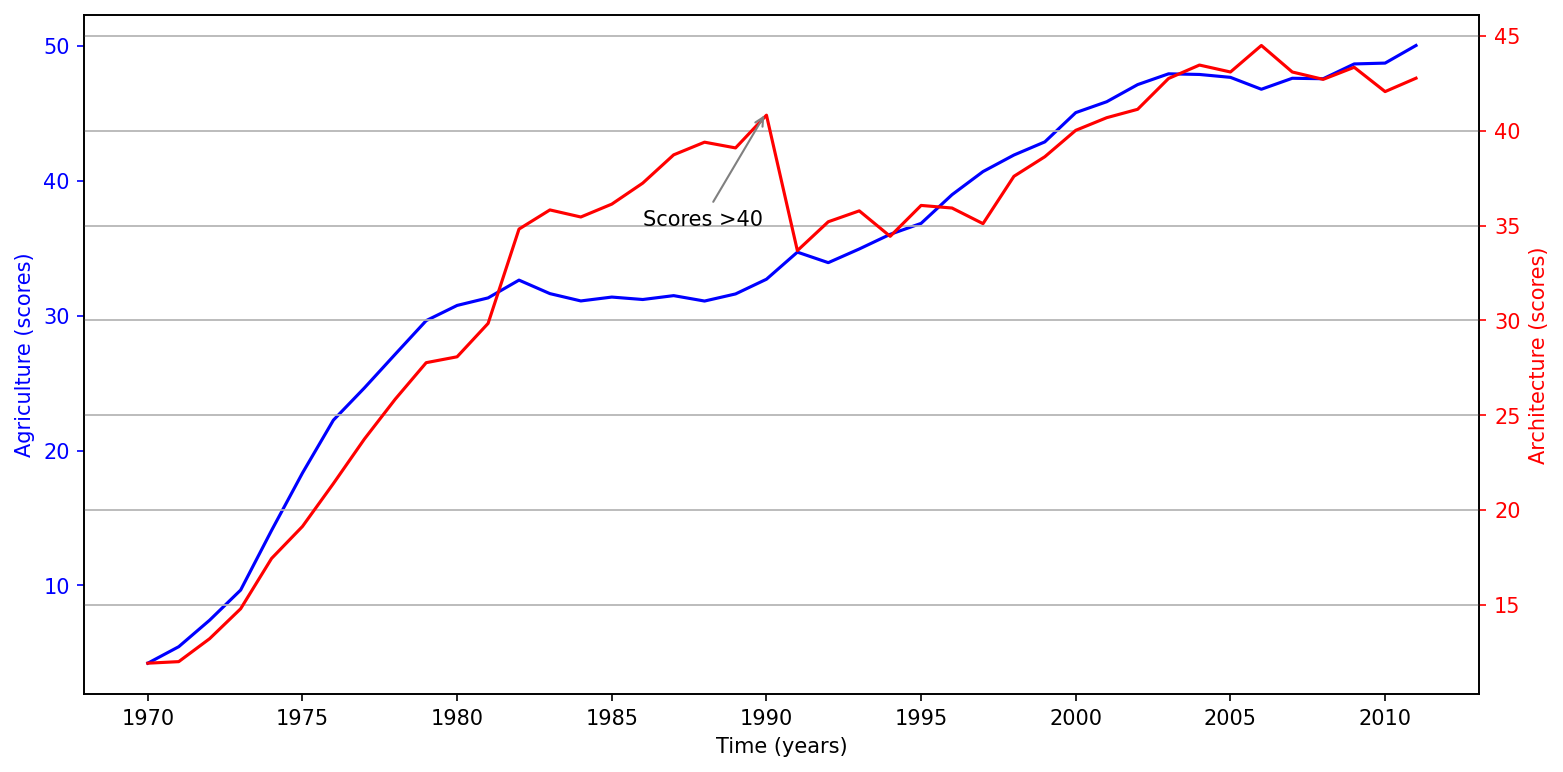

In [12]:
fix, ax = plt.subplots(figsize = (12, 6), dpi = 150)

# Plot the Agriculture scores time-series in blue
plot_timeseries(ax, percent_bachelors['Year'], percent_bachelors['Agriculture'], 
                "blue", "Time (years)", "Agriculture (scores)")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the Architecture scores data in red
plot_timeseries(ax2, percent_bachelors['Year'], percent_bachelors['Architecture'], 
                "red", "Time (years)", "Architecture (scores)")
ax2.annotate("Scores >40", xy = (pd.Timestamp('1990-01-01'), 41),
            xytext = (pd.Timestamp('1986-01-01'), 35),
            arrowprops = {"arrowstyle":"->","color":"gray"})

plt.grid()
plt.show()

## References

1. [Matplotlib - Usage Guide](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)